In [1]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
pd.options.display.float_format = '{:,.3f}'.format

pd.options.mode.chained_assignment = None
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", font_scale = 1.5)
sns.set_context(rc={"lines.markersize": 10})

import matplotlib

import pickle as pkl
from matplotlib import pyplot as plt

new_plot_col=list(range(1800,2010,20))
from scipy.stats.stats import pearsonr
from scipy.stats.stats import pearsonr

from functools import reduce

In [2]:
features=pd.read_csv("../../datasets/features_CompoundAgnostic_20_20_300.pkl", sep="\t")
features['compound_rating']=''
features.loc[features.compound_mean>=4,'compound_rating']='high'
features.loc[(features.compound_mean>=2) & (features.compound_mean<4),'compound_rating']='med'
features.loc[features.compound_mean<2,'compound_rating']='low'
features.compound_rating.value_counts()

low     62
med     59
high    57
Name: compound_rating, dtype: int64

In [3]:
to_add_cols=['compound_mean','compound_rating']
lmi_cols = [col for col in features.columns if 'local_mi' in col]
llr_cols = [col for col in features.columns if 'log_ratio' in col]
ppmi_cols = [col for col in features.columns if 'ppmi' in col]
sim_bw_constituents_cols = [col for col in features.columns if 'sim_bw_constituents' in col]
sim_with_head_cols = [col for col in features.columns if 'sim_with_head' in col]
sim_with_modifier_cols = [col for col in features.columns if 'sim_with_modifier' in col]
#selected_compounds=['health insurance','silver bullet','melting pot','gold mine','swimming pool','bank account']
#assert (len(lmi_cols)+len(llr_cols)+len(ppmi_cols)+len(sim_bw_constituents_cols)+len(sim_with_head_cols)+len(sim_with_modifier_cols))==(len(features.columns))

In [4]:
lmi_df=features.set_index(["modifier", "head"])[lmi_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
lmi_df.reset_index(inplace=True)
lmi_df['compound']=lmi_df['modifier'].str[:-5]+' '+lmi_df['head'].str[:-5]
lmi_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
lmi_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in lmi_df.columns if 'compound' not in x]
lmi_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
lmi_df.reset_index(inplace=True)
plot_lmi_df=pd.melt(lmi_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
lmi_df

,compound,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound_mean,compound_rating
0,end user,0.099,0.119,0.149,0.161,0.175,0.165,0.163,0.444,0.387,0.309,0.300,4.250,high
1,firing line,0.099,0.119,0.149,0.161,0.175,0.391,0.397,0.380,0.372,0.360,0.364,1.704,low
2,game plan,0.099,0.119,0.149,0.161,0.175,0.165,0.163,0.170,0.309,0.281,0.275,3.828,med
3,application form,0.099,0.119,0.149,0.161,0.440,0.417,0.436,0.386,0.325,0.275,0.268,4.800,high
4,web site,0.897,0.119,0.149,0.161,0.666,0.614,0.592,0.533,0.441,0.331,0.310,3.786,med
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,silver lining,0.099,0.119,0.577,0.526,0.175,0.439,0.465,0.489,0.491,0.468,0.466,0.350,low
174,street girl,0.099,0.119,0.149,0.161,0.175,0.165,0.163,0.301,0.289,0.277,0.264,3.158,med
175,subway system,0.099,0.119,0.149,0.161,0.175,0.425,0.391,0.388,0.333,0.311,0.319,4.632,high
176,top dog,0.099,0.119,0.149,0.161,0.175,0.165,0.163,0.170,0.181,0.457,0.457,1.050,low


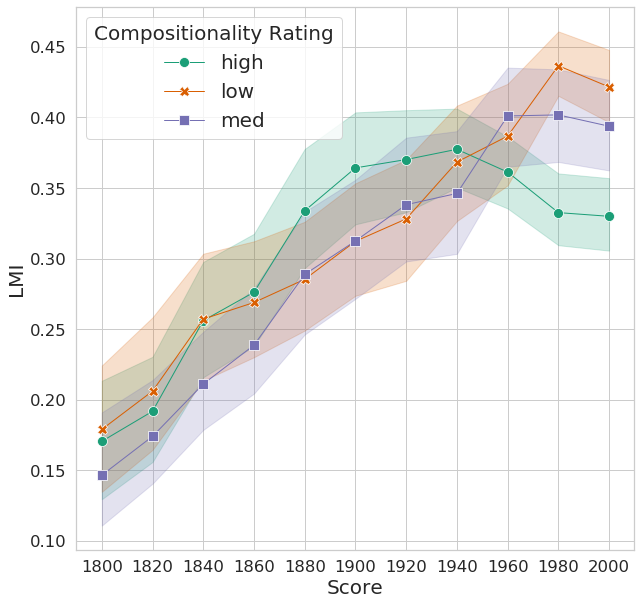

In [5]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_lmi_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("LMI", fontsize=20)
g.legend(title='Compositionality Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.savefig('LMI_merged_new.png')

In [6]:
llr_df=features.set_index(["modifier", "head"])[llr_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
llr_df.reset_index(inplace=True)
llr_df['compound']=llr_df['modifier'].str[:-5]+' '+llr_df['head'].str[:-5]
llr_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
llr_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in llr_df.columns if 'compound' not in x]
llr_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
llr_df.reset_index(inplace=True)
plot_llr_df=pd.melt(llr_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
llr_df.head()

,compound,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound_mean,compound_rating
0,end user,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.237,0.155,0.065,0.068,4.250,high
1,firing line,0.000,0.000,0.000,0.000,0.000,0.181,0.190,0.167,0.141,0.107,0.128,1.704,low
2,game plan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.078,0.044,0.047,3.828,med
3,application form,0.000,0.000,0.000,0.000,0.226,0.209,0.232,0.173,0.094,0.039,0.042,4.800,high
4,web site,0.824,0.000,0.000,0.000,0.481,0.429,0.405,0.336,0.212,0.083,0.077,3.786,med


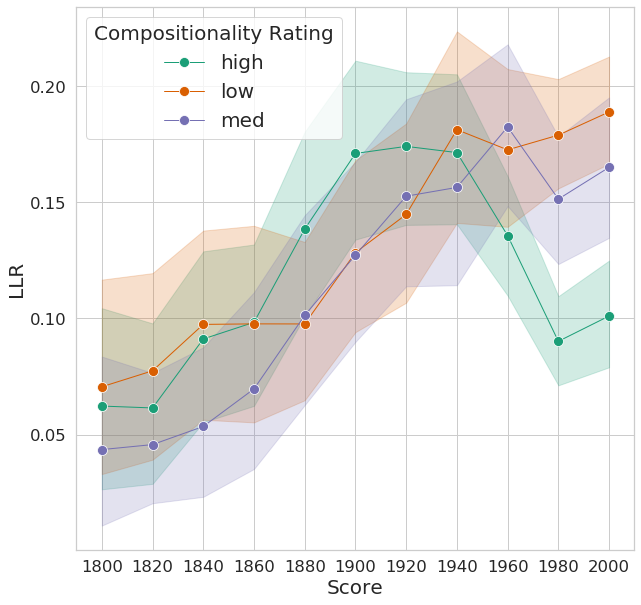

In [7]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_llr_df,palette="Dark2", marker='o',linewidth=1,dashes=False)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("LLR", fontsize=20)
g.legend(title='Compositionality Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.savefig('LLR_merged_new.png')

In [8]:
ppmi_df=features.set_index(["modifier", "head"])[ppmi_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
ppmi_df.reset_index(inplace=True)
ppmi_df['compound']=ppmi_df['modifier'].str[:-5]+' '+ppmi_df['head'].str[:-5]
ppmi_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
ppmi_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in ppmi_df.columns if 'compound' not in x]
ppmi_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
ppmi_df.reset_index(inplace=True)
plot_ppmi_df=pd.melt(ppmi_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
ppmi_df.head()

,compound,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound_mean,compound_rating
0,end user,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.333,0.253,0.153,0.147,4.250,high
1,firing line,0.000,0.000,0.000,0.000,0.000,0.272,0.282,0.256,0.235,0.217,0.227,1.704,low
2,game plan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.157,0.119,0.117,3.828,med
3,application form,0.000,0.000,0.000,0.000,0.323,0.304,0.329,0.263,0.177,0.111,0.108,4.800,high
4,web site,0.892,0.000,0.000,0.000,0.597,0.539,0.513,0.438,0.318,0.180,0.159,3.786,med


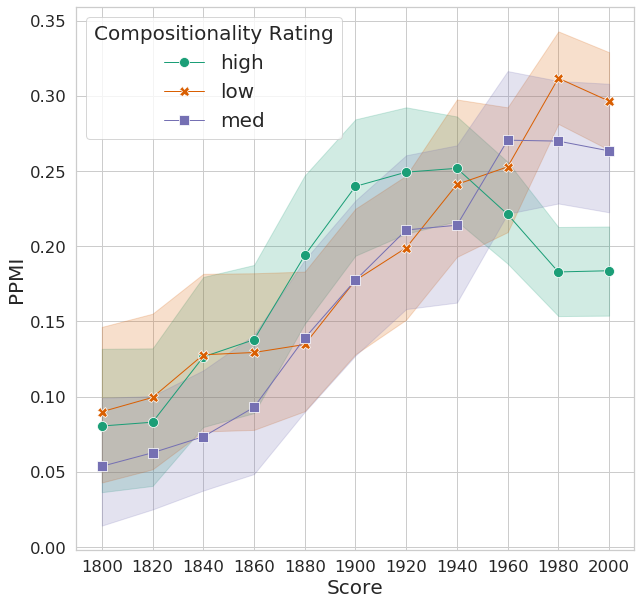

In [9]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_ppmi_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("PPMI", fontsize=20)
g.legend(title='Compositionality Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.savefig('PPMI_merged_new.png')

In [10]:
sim_bw_constituents_df=features.set_index(["modifier", "head"])[sim_bw_constituents_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
sim_bw_constituents_df.reset_index(inplace=True)
sim_bw_constituents_df['compound']=sim_bw_constituents_df['modifier'].str[:-5]+' '+sim_bw_constituents_df['head'].str[:-5]
sim_bw_constituents_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
sim_bw_constituents_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in sim_bw_constituents_df.columns if 'compound' not in x]
sim_bw_constituents_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
sim_bw_constituents_df.reset_index(inplace=True)
plot_sim_bw_constituents_df=pd.melt(sim_bw_constituents_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
sim_bw_constituents_df.head()

,compound,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound_mean,compound_rating
0,end user,0.172,0.168,0.169,0.219,0.199,0.199,0.185,0.187,0.278,0.280,0.284,4.250,high
1,firing line,0.172,0.168,0.169,0.219,0.199,0.196,0.179,0.180,0.279,0.290,0.283,1.704,low
2,game plan,0.172,0.168,0.169,0.219,0.199,0.199,0.185,0.186,0.279,0.282,0.283,3.828,med
3,application form,0.172,0.168,0.169,0.219,0.203,0.205,0.189,0.192,0.284,0.305,0.284,4.800,high
4,web site,0.414,0.168,0.169,0.219,0.418,0.418,0.404,0.420,0.481,0.323,0.310,3.786,med


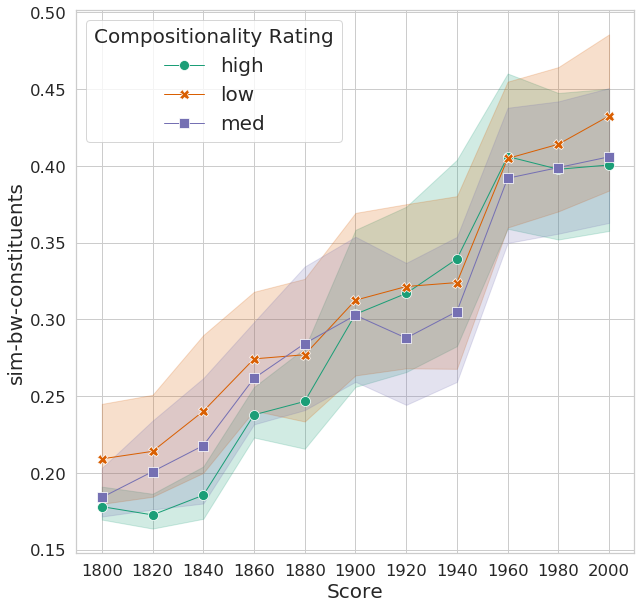

In [11]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_sim_bw_constituents_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("sim-bw-constituents", fontsize=20)
g.legend(title='Compositionality Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.savefig('sim-bw-const_merged_new.png')

In [12]:
sim_with_head_df=features.set_index(["modifier", "head"])[sim_with_head_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
sim_with_head_df.reset_index(inplace=True)
sim_with_head_df['compound']=sim_with_head_df['modifier'].str[:-5]+' '+sim_with_head_df['head'].str[:-5]
sim_with_head_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
sim_with_head_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in sim_with_head_df.columns if 'compound' not in x]
sim_with_head_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
sim_with_head_df.reset_index(inplace=True)
plot_sim_with_head_df=pd.melt(sim_with_head_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
sim_with_head_df.head()

,compound,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound_mean,compound_rating
0,end user,0.509,0.531,0.512,0.501,0.518,0.517,0.524,0.685,0.655,0.663,0.660,4.250,high
1,firing line,0.509,0.531,0.512,0.501,0.518,0.725,0.738,0.743,0.713,0.720,0.718,1.704,low
2,game plan,0.509,0.531,0.512,0.501,0.518,0.517,0.524,0.524,0.431,0.445,0.441,3.828,med
3,application form,0.509,0.531,0.512,0.501,0.387,0.419,0.506,0.505,0.483,0.548,0.418,4.800,high
4,web site,0.509,0.531,0.512,0.501,0.521,0.514,0.522,0.526,0.524,0.551,0.553,3.786,med


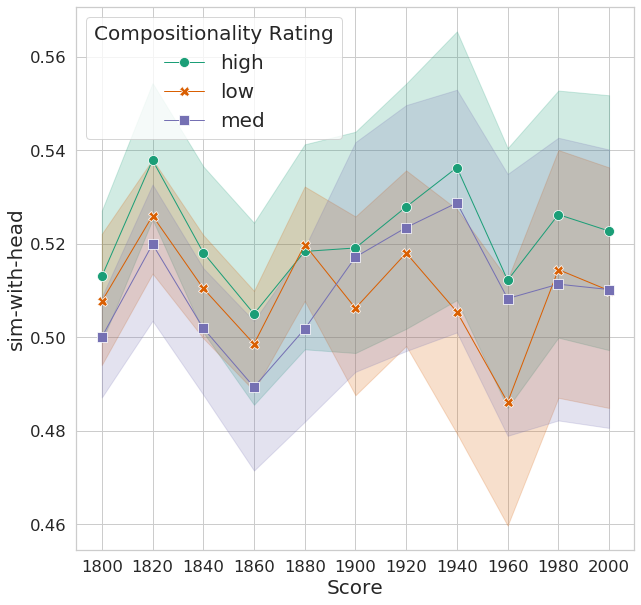

In [13]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_sim_with_head_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("sim-with-head", fontsize=20)
g.legend(title='Compositionality Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.savefig('sim-with-head_merged_new.png')

In [14]:
sim_with_modifier_df=features.set_index(["modifier", "head"])[sim_with_modifier_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
sim_with_modifier_df.reset_index(inplace=True)
sim_with_modifier_df['compound']=sim_with_modifier_df['modifier'].str[:-5]+' '+sim_with_modifier_df['head'].str[:-5]
sim_with_modifier_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
sim_with_modifier_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in sim_with_modifier_df.columns if 'compound' not in x]
sim_with_modifier_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
sim_with_modifier_df.reset_index(inplace=True)
plot_sim_with_modifier_df=pd.melt(sim_with_modifier_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
sim_with_modifier_df.head()

,compound,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound_mean,compound_rating
0,end user,0.509,0.531,0.512,0.501,0.518,0.517,0.524,0.685,0.655,0.663,0.660,4.250,high
1,firing line,0.509,0.531,0.512,0.501,0.518,0.725,0.738,0.743,0.713,0.720,0.718,1.704,low
2,game plan,0.509,0.531,0.512,0.501,0.518,0.517,0.524,0.524,0.431,0.445,0.441,3.828,med
3,application form,0.509,0.531,0.512,0.501,0.387,0.419,0.506,0.505,0.483,0.548,0.418,4.800,high
4,web site,0.509,0.531,0.512,0.501,0.521,0.514,0.522,0.526,0.524,0.551,0.553,3.786,med


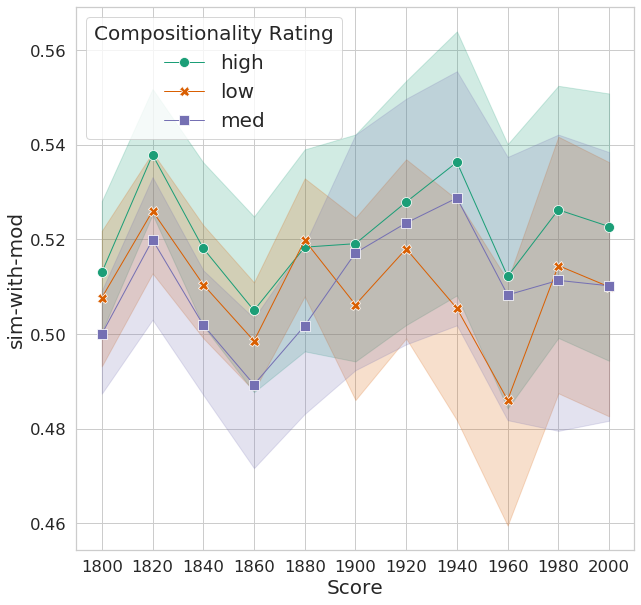

In [15]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_sim_with_modifier_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("sim-with-mod", fontsize=20)
g.legend(title='Compositionality Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.savefig('sim-with-mod_merged_new.png')

In [16]:
compounds=pd.read_pickle("../../datasets/compounds_CompoundAgnostic_20_20_300.pkl")
compounds.head()

common     0      1      2      3  \
modifier head         time                                                   
'_noun   a'_noun      1980       '_noun a'_noun 0.002 -0.005  0.008  0.002   
         a'isha_noun  1960   '_noun a'isha_noun 0.083  0.021 -0.075 -0.006   
                      1980   '_noun a'isha_noun 0.084  0.021 -0.076 -0.007   
                      2000   '_noun a'isha_noun 0.095  0.022 -0.089 -0.013   
         a'ishah_noun 1980  '_noun a'ishah_noun 0.083  0.021 -0.075 -0.006   

                                4      5      6      7      8  ...    290  \
modifier head         time                                     ...          
'_noun   a'_noun      1980 -0.003 -0.002  0.002 -0.004 -0.021  ... -0.047   
         a'isha_noun  1960 -0.001  0.019 -0.043 -0.067  0.042  ... -0.051   
                      1980 -0.000  0.020 -0.044 -0.067  0.042  ... -0.050   
                      2000  0.013  0.028 -0.048 -0.065  0.045  ... -0.045   
         a'ishah_noun 1980 -0.001  0.019 -0.043 -0.067  0.042  ... -0.051   

                             291   292    293    294    295    296    297  \
modifier head         time                                                  
'_noun   a'_noun      1980 0.111 0.038  0.151 -0.008 -0.202 -0.066 -0.164   
         a'isha_noun  1960 0.100 0.072 -0.141  0.033 -0.043 -0.011  0.020   
                      1980 0.101 0.072 -0.141  0.034 -0.043 -0.011  0.020   
                      2000 0.106 0.072 -0.143  0.039 -0.043 -0.014  0.020   
         a'ishah_noun 1980 0.100 0.072 -0.141  0.033 -0.043 -0.011  0.020   

                             298    299  
modifier head         time               
'_noun   a'_noun      1980 0.067 -0.020  
         a'isha_noun  1960 0.050 -0.034  
                      1980 0.051 -0.033  
                      2000 0.062 -0.022  
         a'ishah_noun 1980 0.050 -0.034  

[5 rows x 301 columns]

In [17]:
merge_df_aware=features[['modifier','head','compound_rating']].merge(compounds.drop(['common'],axis=1).reset_index(),on=['modifier','head'],how='inner')
merge_df_aware.set_index(["modifier", "head",'time','compound_rating'], inplace = True)
merge_df_aware.head()

0      1     2      3      4    \
modifier    head      time compound_rating                                    
end_noun    user_noun 1940 high            0.621 -0.408 0.532 -0.007 -0.131   
                      1960 high            0.673 -0.418 0.490 -0.033 -0.072   
                      1980 high            0.646 -0.409 0.496 -0.021 -0.079   
                      2000 high            0.624 -0.399 0.496 -0.009 -0.089   
firing_noun line_noun 1900 low             0.409 -0.259 0.316  0.008 -0.088   

                                              5      6      7      8      9    \
modifier    head      time compound_rating                                      
end_noun    user_noun 1940 high            -0.014 -0.031 -0.032 -0.081  0.005   
                      1960 high            -0.021 -0.055 -0.065 -0.158  0.007   
                      1980 high            -0.026 -0.029 -0.032 -0.106 -0.066   
                      2000 high            -0.025 -0.017 -0.019 -0.068 -0.100   
firing_noun line_noun 1900 low              0.031 -0.042 -0.064  0.081  0.174   

                                            ...    290    291    292    293  \
modifier    head      time compound_rating  ...                               
end_noun    user_noun 1940 high             ... -0.005  0.004 -0.012 -0.003   
                      1960 high             ... -0.005  0.000  0.002  0.013   
                      1980 high             ...  0.013  0.004 -0.010 -0.000   
                      2000 high             ...  0.018 -0.000 -0.013 -0.007   
firing_noun line_noun 1900 low              ... -0.037  0.011  0.000 -0.021   

                                              294    295    296    297    298  \
modifier    head      time compound_rating                                      
end_noun    user_noun 1940 high            -0.013  0.005 -0.026  0.024  0.010   
                      1960 high             0.013  0.001 -0.008  0.003 -0.001   
                      1980 high             0.016 -0.000 -0.018 -0.002  0.015   
                      2000 high             0.019 -0.003 -0.012  0.001  0.019   
firing_noun line_noun 1900 low             -0.009  0.063 -0.030  0.026 -0.011   

                                             299  
modifier    head      time compound_rating        
end_noun    user_noun 1940 high            0.006  
                      1960 high            0.001  
                      1980 high            0.001  
                      2000 high            0.004  
firing_noun line_noun 1900 low             0.004  

[5 rows x 300 columns]

In [18]:
def cosine(row1,row2):
    if row1.name[:-2]!=row2.name[:-2]:
        return np.nan
    else:
        denom1=np.sqrt(np.sum(np.square(row1)))
        denom2=np.sqrt(np.sum(np.square(row2)))
        num=np.sum(row1*row2)
        return num/(denom1*denom2)

In [19]:
cosine(merge_df_aware.iloc[2-1],merge_df_aware.iloc[2])

0.9679003524099784

In [20]:
cosine_compound_agnostic=[np.nan]
for i in range(1,merge_df_aware.shape[0]):
    cosine_compound_agnostic.append(cosine(merge_df_aware.iloc[i-1],merge_df_aware.iloc[i]))

In [31]:
merge_df_aware['compound_cosine']=cosine_compound_agnostic
compound_df=pd.pivot_table(merge_df_aware.reset_index(), values = 'compound_cosine', index=['modifier','head','compound_rating'], columns = 'time')
compound_df

time                                               1820  1840  1860  1880  \
modifier         head             compound_rating                           
academy_noun     award_noun       med               nan   nan   nan   nan   
acid_noun        test_noun        low               nan   nan   nan   nan   
application_noun form_noun        high              nan   nan   nan   nan   
balance_noun     sheet_noun       med               nan 0.669 0.961 0.964   
banana_noun      republic_noun    low               nan   nan   nan   nan   
...                                                 ...   ...   ...   ...   
wedding_noun     anniversary_noun high              nan   nan 1.000 0.991   
                 day_noun         high            0.988 0.994 0.997 0.997   
winter_noun      solstice_noun    high            0.961 0.936 0.972 0.949   
word_noun        painting_noun    low               nan   nan   nan   nan   
world_noun       conference_noun  med               nan   nan   nan 0.073   

time                                               1900  1920  1940  1960  \
modifier         head             compound_rating                           
academy_noun     award_noun       med               nan   nan 0.814 0.929   
acid_noun        test_noun        low             0.921 0.392 1.000 0.841   
application_noun form_noun        high            0.959 0.982 0.985 0.991   
balance_noun     sheet_noun       med             0.970 0.980 0.995 0.982   
banana_noun      republic_noun    low               nan   nan   nan   nan   
...                                                 ...   ...   ...   ...   
wedding_noun     anniversary_noun high            0.783 0.929 0.964 0.983   
                 day_noun         high            0.996 0.998 0.999 0.999   
winter_noun      solstice_noun    high            0.985 0.978 0.992 0.990   
word_noun        painting_noun    low             0.647 0.860   nan   nan   
world_noun       conference_noun  med             0.097 0.702 0.821 0.834   

time                                               1980  2000  
modifier         head             compound_rating              
academy_noun     award_noun       med             0.983 0.999  
acid_noun        test_noun        low             0.760 0.982  
application_noun form_noun        high            0.970 0.988  
balance_noun     sheet_noun       med             0.982 0.997  
banana_noun      republic_noun    low             0.767 0.534  
...                                                 ...   ...  
wedding_noun     anniversary_noun high            0.979 0.994  
                 day_noun         high            0.997 0.999  
winter_noun      solstice_noun    high            0.998 0.998  
word_noun        painting_noun    low               nan 0.988  
world_noun       conference_noun  med             0.391 0.979  

[172 rows x 10 columns]

In [33]:
compound_df

time,compound_rating,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound
0,med,nan,nan,nan,nan,nan,nan,0.814,0.929,0.983,0.999,academy award
1,low,nan,nan,nan,nan,0.921,0.392,1.000,0.841,0.760,0.982,acid test
2,high,nan,nan,nan,nan,0.959,0.982,0.985,0.991,0.970,0.988,application form
3,med,nan,0.669,0.961,0.964,0.970,0.980,0.995,0.982,0.982,0.997,balance sheet
4,low,nan,nan,nan,nan,nan,nan,nan,nan,0.767,0.534,banana republic
...,...,...,...,...,...,...,...,...,...,...,...,...
167,high,nan,nan,1.000,0.991,0.783,0.929,0.964,0.983,0.979,0.994,wedding anniversary
168,high,0.988,0.994,0.997,0.997,0.996,0.998,0.999,0.999,0.997,0.999,wedding day
169,high,0.961,0.936,0.972,0.949,0.985,0.978,0.992,0.990,0.998,0.998,winter solstice
170,low,nan,nan,nan,nan,0.647,0.860,nan,nan,nan,0.988,word painting


In [32]:
compound_df.reset_index(inplace=True)
compound_df['compound']=compound_df['modifier'].str[:-5]+' '+compound_df['head'].str[:-5]
compound_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_compound_df=plot_compound_df.loc[plot_compound_df['compound'].isin(selected_compounds)]
#compound_df.set_index('compound',inplace=True)
#plot_compound_df=plot_compound_df[plot_compound_df.columns[10:]]
plot_compound_df=pd.melt(compound_df,id_vars=['compound','compound_rating'],
                        value_vars=list(range(1820,2009,20)))
plot_compound_df

,compound,compound_rating,time,value
0,academy award,med,1820,nan
1,acid test,low,1820,nan
2,application form,high,1820,nan
3,balance sheet,med,1820,nan
4,banana republic,low,1820,nan
...,...,...,...,...
1715,wedding anniversary,high,2000,0.994
1716,wedding day,high,2000,0.999
1717,winter solstice,high,2000,0.998
1718,word painting,low,2000,0.988


(1900, 2009)

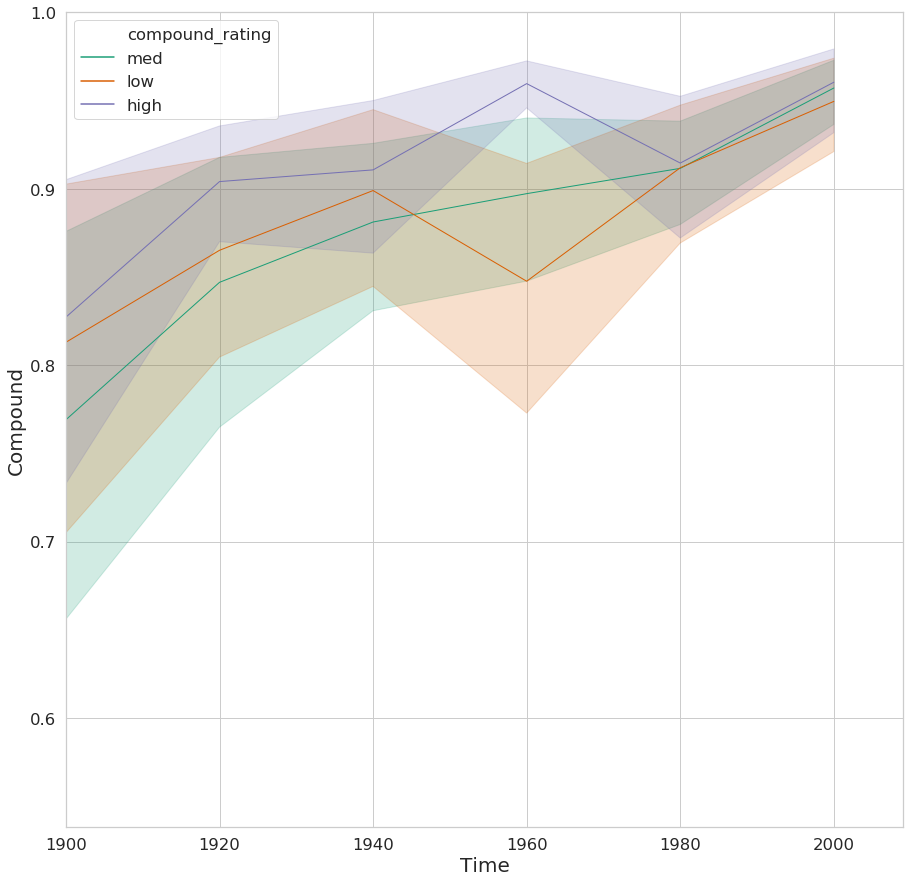

In [23]:
plt.figure(figsize=(15,15))
g=sns.lineplot(x="time", y="value", hue="compound_rating",style="compound_rating",data=plot_compound_df,palette="Dark2",linewidth=1,dashes=False)#,err_style="bars", ci=68)
g.set_xlabel("Time", fontsize=20)
g.set_ylabel("Compound", fontsize=20)
#g.legend(title='Compound Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
g.set_xlim(1900, 2009)

In [24]:
heads=pd.read_pickle("../../datasets/constituents_CompoundAgnostic_20_20_300.pkl")
heads.index.set_names('head',level=0,inplace=True)
heads.head()


0      1     2      3     4      5     6     7     8     9    \
head   time                                                                  
a_noun 1800 0.718 -0.287 0.089 -0.032 0.144 -0.108 0.150 0.241 0.055 0.180   
       1820 0.732 -0.286 0.078 -0.030 0.133 -0.118 0.149 0.232 0.057 0.182   
       1840 0.744 -0.290 0.084 -0.032 0.150 -0.107 0.140 0.215 0.065 0.183   
       1860 0.748 -0.306 0.121 -0.039 0.185 -0.096 0.125 0.189 0.066 0.173   
       1880 0.754 -0.322 0.155 -0.046 0.222 -0.088 0.115 0.170 0.061 0.159   

             ...    290    291    292    293   294    295   296   297   298  \
head   time  ...                                                              
a_noun 1800  ... -0.017  0.000 -0.016 -0.005 0.001 -0.006 0.008 0.012 0.013   
       1820  ... -0.015 -0.001 -0.013 -0.005 0.001 -0.003 0.007 0.010 0.012   
       1840  ... -0.011 -0.004 -0.010 -0.001 0.004 -0.002 0.005 0.009 0.011   
       1860  ... -0.006 -0.003 -0.006  0.001 0.004  0.000 0.004 0.008 0.007   
       1880  ... -0.004 -0.000 -0.004  0.002 0.004  0.001 0.004 0.006 0.006   

              299  
head   time        
a_noun 1800 0.017  
       1820 0.018  
       1840 0.016  
       1860 0.012  
       1880 0.008  

[5 rows x 300 columns]

In [25]:
merge_df_aware_heads=features[['modifier','head']].merge(heads.reset_index(),on=['head'],how='inner')
merge_df_aware_heads.set_index(["modifier", "head",'time'], inplace = True)
merge_df_aware_heads.head()

0      1      2      3      4     5      6      7    \
modifier head      time                                                         
end_noun user_noun 1800 0.033 -0.008 -0.007 -0.001  0.001 0.003 -0.006 -0.019   
                   1820 0.033 -0.006 -0.012 -0.005 -0.000 0.004 -0.012 -0.022   
                   1840 0.036 -0.007 -0.006 -0.005 -0.004 0.003 -0.013 -0.022   
                   1860 0.115 -0.047  0.036  0.006 -0.004 0.005 -0.002 -0.022   
                   1880 0.180 -0.085  0.081 -0.002 -0.014 0.001 -0.010 -0.025   

                          8     9    ...   290    291   292   293    294  \
modifier head      time              ...                                   
end_noun user_noun 1800 0.054 0.044  ... 0.026 -0.077 0.083 0.050 -0.035   
                   1820 0.035 0.049  ... 0.044 -0.079 0.095 0.050 -0.021   
                   1840 0.033 0.052  ... 0.047 -0.077 0.097 0.048 -0.018   
                   1860 0.026 0.002  ... 0.033 -0.068 0.081 0.021 -0.042   
                   1880 0.031 0.030  ... 0.030 -0.062 0.080 0.038 -0.031   

                           295    296   297   298   299  
modifier head      time                                  
end_noun user_noun 1800 -0.046  0.039 0.277 0.023 0.108  
                   1820 -0.022  0.018 0.277 0.021 0.099  
                   1840 -0.017  0.014 0.275 0.023 0.099  
                   1860 -0.067 -0.017 0.251 0.024 0.095  
                   1880 -0.046 -0.001 0.250 0.040 0.094  

[5 rows x 300 columns]

In [26]:
cosine_head_agnostic=[np.nan]
for i in range(1,merge_df_aware_heads.shape[0]):
    cosine_head_agnostic.append(cosine(merge_df_aware_heads.iloc[i-1],merge_df_aware_heads.iloc[i]))


In [27]:
merge_df_aware_heads['head_cosine']=cosine_head_agnostic
head_df=pd.pivot_table(merge_df_aware_heads.reset_index(), values = 'head_cosine', index=['modifier','head'], columns = 'time')
head_df.drop([1800],axis=1,inplace=True)
head_df

time                               1820  1840  1860  1880  1900  1920  1940  \
modifier         head                                                         
academy_noun     award_noun       0.992 0.987 0.992 0.994 0.996 0.993 0.971   
acid_noun        test_noun        0.985 0.976 0.979 0.973 0.990 0.991 0.998   
agony_noun       aunt_noun        0.994 0.990 0.982 0.995 0.995 0.992 0.994   
application_noun form_noun        0.995 0.994 0.990 0.996 0.997 0.996 0.998   
balance_noun     sheet_noun       0.979 0.987 0.984 0.992 0.926 0.961 0.998   
...                                 ...   ...   ...   ...   ...   ...   ...   
wedding_noun     anniversary_noun 0.949 0.984 0.989 0.963 0.982 0.979 0.983   
                 day_noun         0.998 0.999 0.997 0.998 0.998 0.998 0.998   
winter_noun      solstice_noun    0.923 0.925 0.965 0.939 0.980 0.953 0.945   
word_noun        painting_noun    0.997 0.994 0.995 0.998 0.996 0.998 0.998   
world_noun       conference_noun  0.993 0.921 0.993 0.993 0.958 0.917 0.967   

time                               1960  1980  2000  
modifier         head                                
academy_noun     award_noun       0.957 0.941 0.995  
acid_noun        test_noun        0.997 0.998 1.000  
agony_noun       aunt_noun        0.996 0.996 0.997  
application_noun form_noun        0.997 0.997 0.972  
balance_noun     sheet_noun       0.999 0.998 0.999  
...                                 ...   ...   ...  
wedding_noun     anniversary_noun 0.962 0.969 0.989  
                 day_noun         0.998 0.996 0.997  
winter_noun      solstice_noun    0.955 0.931 0.965  
word_noun        painting_noun    0.998 0.999 0.999  
world_noun       conference_noun  0.937 0.914 0.968  

[178 rows x 10 columns]

In [28]:
plot_head_df=head_df.reset_index()
plot_head_df['compound']=plot_head_df['modifier'].str[:-5]+' '+plot_head_df['head'].str[:-5]
plot_head_df.drop(['modifier','head'],axis=1,inplace=True)
plot_head_df.set_index('compound',inplace=True)
plot_head_df

time,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000
compound,,,,,,,,,,
academy award,0.992,0.987,0.992,0.994,0.996,0.993,0.971,0.957,0.941,0.995
acid test,0.985,0.976,0.979,0.973,0.990,0.991,0.998,0.997,0.998,1.000
agony aunt,0.994,0.990,0.982,0.995,0.995,0.992,0.994,0.996,0.996,0.997
application form,0.995,0.994,0.990,0.996,0.997,0.996,0.998,0.997,0.997,0.972
balance sheet,0.979,0.987,0.984,0.992,0.926,0.961,0.998,0.999,0.998,0.999
...,...,...,...,...,...,...,...,...,...,...
wedding anniversary,0.949,0.984,0.989,0.963,0.982,0.979,0.983,0.962,0.969,0.989
wedding day,0.998,0.999,0.997,0.998,0.998,0.998,0.998,0.998,0.996,0.997
winter solstice,0.923,0.925,0.965,0.939,0.980,0.953,0.945,0.955,0.931,0.965


In [29]:
compound_df

time,compound_rating,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound
0,med,nan,nan,nan,nan,nan,nan,0.814,0.929,0.983,0.999,academy award
1,low,nan,nan,nan,nan,0.921,0.392,1.000,0.841,0.760,0.982,acid test
2,high,nan,nan,nan,nan,0.959,0.982,0.985,0.991,0.970,0.988,application form
3,med,nan,0.669,0.961,0.964,0.970,0.980,0.995,0.982,0.982,0.997,balance sheet
4,low,nan,nan,nan,nan,nan,nan,nan,nan,0.767,0.534,banana republic
...,...,...,...,...,...,...,...,...,...,...,...,...
167,high,nan,nan,1.000,0.991,0.783,0.929,0.964,0.983,0.979,0.994,wedding anniversary
168,high,0.988,0.994,0.997,0.997,0.996,0.998,0.999,0.999,0.997,0.999,wedding day
169,high,0.961,0.936,0.972,0.949,0.985,0.978,0.992,0.990,0.998,0.998,winter solstice
170,low,nan,nan,nan,nan,0.647,0.860,nan,nan,nan,0.988,word painting


In [30]:
plt.figure(figsize=(10,10))
for i in range(0,compound_df.drop(['time','compound_rating'],axis=1).shape[0]):
    
    plt.figure()
    g=sns.lineplot(data=compound_df.iloc[i].to_frame(), palette="Paired", marker='o',linewidth=1,dashes=False)
    g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
    g.legend(title=compound_df.iloc[i].name, title_fontsize=20)

#g.set(ylim=(-150, 150))

KeyError: "['time'] not found in axis"

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,10))
g=sns.lineplot(data=plot_lmi_df.sample(n=10,random_state=1001).transpose(), palette="Paired", marker='o',linewidth=1,dashes=False)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#g.set(ylim=(-150, 150))